In [1]:
from qiskit import *  # import everything from qiskit

In [2]:
qr = QuantumRegister(2)    # quantum register containing 2 qubits
cr = ClassicalRegister(2)  # classical register containing 2 bits

In [3]:
circuit = QuantumCircuit(qr, cr) # creates a quantum circuit

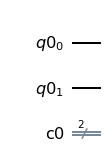

In [4]:
# to see the cretaed circuit at any stage do the following
%matplotlib inline
circuit.draw()

In [5]:
circuit.h(qr[0])  # applying the hadamard gate on the first qubit

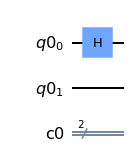

In [8]:
circuit.draw()

In [9]:
circuit.cx(qr[0], qr[1]) # applying controlled X, 1st qubit is control qubit, 2nd qubit is target

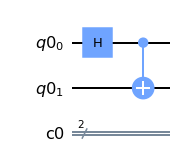

In [10]:
circuit.draw()

In [11]:
circuit.measure(qr, cr) # measure qubits and store outcome in classical bits

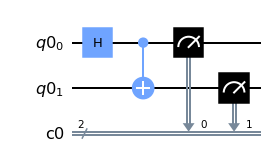

In [12]:
circuit.draw()

In [14]:
simulator = Aer.get_backend('qasm_simulator')  # using simulator to run the circuit on PC
execute(circuit, backend = simulator)

In [15]:
result = execute(circuit, backend = simulator).result()  # assign the result of the circuit to a variable 'result'

In [16]:
from qiskit.tools.visualization import plot_histogram  # import necessary tools to visualize the results

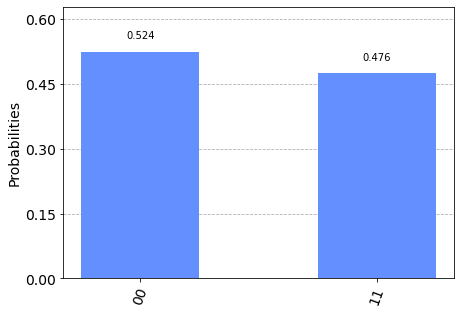

In [17]:
plot_histogram(result.get_counts(circuit))

In [18]:
# we don't get exact 0.5, 0.5 because of the limited no. of times that we are trying

# now we will run our circuit on IBM's quantum  devices
IBMQ.load_account()  # load your account

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=qcomp)

In [20]:
from qiskit.tools.monitor import job_monitor

In [21]:
job_monitor(job)  # since the devices are open for public use, there's a queue

Job Status: job has successfully run


In [24]:
final_result = job.result()

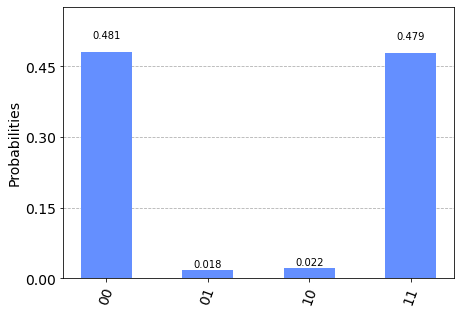

In [25]:
plot_histogram(final_result.get_counts(circuit))

In [ ]:
# we got some finite probability for 01 and 10 as well, this is due to noise